<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:Amirreza Dehghani

**Student ID**:400101197





## Importing Libraries

First we import libraries that we need for this assignment.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# import any other libraries needed below

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [36]:
X, Y = None, None

### START CODE HERE ###
data_logistic=pd.read_csv('data_logistic.csv')
data_logistic2=pd.read_csv('data2_logistic.csv')
X=data_logistic.iloc[:,:3]
Y=data_logistic['Y']
### END CODE HERE ###
print(X.shape)
print(Y.shape)


(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:

In [37]:
### START CODE HERE ###
X_norm=(X-np.mean(X,axis=0))/np.std(X,axis=0)
Y_norm=(Y-np.mean(Y))/np.std(Y)

'''
Normalizing data before training a machine learning model is essential for several reasons:

1. **Improved Convergence**: Normalizing the features helps gradient descent algorithms converge more quickly. When features are on different scales, the optimization process can be slow, as the learning rate may need to be adjusted for each feature.

2. **Stable Training**: Normalization helps prevent numerical instability issues during training, such as overflow or underflow, especially in algorithms that involve exponentiation or division.

3. **Balanced Influence**: Features with larger magnitudes may disproportionately influence the learning process. Normalizing features ensures that each feature contributes more evenly to the learning process, leading to a more balanced model.

4. **Better Generalization**: Normalization prevents the model from focusing solely on the features with larger magnitudes, which can lead to overfitting. It encourages the model to learn meaningful patterns across all features, leading to better generalization to unseen data.

5. **Algorithm Compatibility**: Some machine learning algorithms, such as k-nearest neighbors (KNN) or support vector machines (SVM), are sensitive to the scale of features. Normalizing the data ensures that these algorithms perform optimally.

Overall, data normalization is a crucial preprocessing step that promotes stable, efficient, and effective training of machine learning models.
'''
### END CODE HERE ###

'\nNormalizing data before training a machine learning model is essential for several reasons:\n\n1. **Improved Convergence**: Normalizing the features helps gradient descent algorithms converge more quickly. When features are on different scales, the optimization process can be slow, as the learning rate may need to be adjusted for each feature.\n\n2. **Stable Training**: Normalization helps prevent numerical instability issues during training, such as overflow or underflow, especially in algorithms that involve exponentiation or division.\n\n3. **Balanced Influence**: Features with larger magnitudes may disproportionately influence the learning process. Normalizing features ensures that each feature contributes more evenly to the learning process, leading to a more balanced model.\n\n4. **Better Generalization**: Normalization prevents the model from focusing solely on the features with larger magnitudes, which can lead to overfitting. It encourages the model to learn meaningful patt

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [38]:
### START CODE HERE ###
X_with_bias=np.hstack((np.ones((X_norm.shape[0], 1)), X_norm))
X=X_with_bias
### END CODE HERE ###

print(X.shape)

(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [61]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###
    
    Z=np.asarray(Z)
    numeratur=1
    denumeratur=1+np.exp(-Z)
    
    return numeratur/denumeratur
    ### END CODE HERE ###

### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [112]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    
    m, n = X.shape
    loss = None
    eps = 1e-5
    ### START CODE HERE ###
    h_theta = sigmoid(np.dot(X, theta))  # Predicted probabilities
    error = -y @ np.log(h_theta + eps) - (1 - y) @ np.log(1 - h_theta + eps)  # Error term
    
    regularization_term = (regLambda / (2 * m)) * np.sum(np.square(theta[1:]))  # Regularization term excluding bias term
    cost = (1 / m) * np.sum(error) + regularization_term
    return cost
    ### END CODE HERE ###
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
'We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$'

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:

In [113]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''
    
    m, n = X.shape
    grad = None
    ### START CODE HERE ###
    m = len(y)  # Number of instances
    n = X.shape[1]  # Number of features
    h_theta = sigmoid(X.dot(theta))  # Predictions
    h_theta = h_theta
    error = h_theta - np.asarray(y).reshape((m, 1))  # Prediction error

    # Compute gradient without regularization
    grad = (1 / m) * np.dot(X.T, error)
    # Regularize all but the bias term (theta_0)
    regularization = (regLambda / m) * theta
    regularization[0] = np.sum(h_theta - np.asarray(y).reshape((m, 1))) # Don't regularize bias term\
    #regularization = regularization.reshape((-1))
    grad += regularization
        
    ### END CODE HERE ###
    return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [156]:
def fit(X, y, regLambda = 0.01, alpha = 0.001, epsilon = 1e-4, maxNumIters = 5000):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''
    
    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []

    for i in range(maxNumIters):
        loss = computeCost(theta, X, y, regLambda)
        gradient = computeGradient(theta, X, y, regLambda)
        theta_new = theta - alpha * gradient

        if hasConverged(theta, theta_new, epsilon):
            break

        theta = theta_new
        loss_history.append(loss)

    return theta, np.array(loss_history)


    ### END CODE HERE ###





def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    
    ### START CODE HERE ###

    ### END CODE HERE ###
    return np.linalg.norm(theta_new - theta_old) <= epsilon






Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [157]:
theta, loss_history = fit(X, Y) # calculating theta and loss of each iteration

### START CODE HERE ###
# Print the loss of each iteration
for i, loss in enumerate(loss_history):
    print(f"Iteration {i + 1}: Loss = {loss}")

# Print the final theta
print(f"Final Theta: {theta.flatten()}")
### END CODE HERE ###


Iteration 1: Loss = 0.6931271807599442
Iteration 2: Loss = 0.7283632011056224
Iteration 3: Loss = 0.7075301960737646
Iteration 4: Loss = 0.7508443951593419
Iteration 5: Loss = 0.714099777928466
Iteration 6: Loss = 0.760920632238217
Iteration 7: Loss = 0.7160164940295353
Iteration 8: Loss = 0.7639247599795895
Iteration 9: Loss = 0.7163263002421039
Iteration 10: Loss = 0.7645221151629721
Iteration 11: Loss = 0.7161973898737938
Iteration 12: Loss = 0.7644650640225394
Iteration 13: Loss = 0.7159573635945095
Iteration 14: Loss = 0.7642422985640355
Iteration 15: Loss = 0.7156898117259742
Iteration 16: Loss = 0.7639783361143205
Iteration 17: Loss = 0.7154155382434166
Iteration 18: Loss = 0.7637041557108039
Iteration 19: Loss = 0.7151396885726263
Iteration 20: Loss = 0.7634274188327773
Iteration 21: Loss = 0.7148635333525667
Iteration 22: Loss = 0.7631500175543893
Iteration 23: Loss = 0.7145873862212778
Iteration 24: Loss = 0.7628724190554109
Iteration 25: Loss = 0.7143113245613686
Iteration 2

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [45]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.33, random_state=42)
### END CODE HERE ###

Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [46]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    
    Y = None
    ### START CODE HERE ###
    z = np.dot(X, theta)
    # Compute the predicted probabilities using the sigmoid function
    h_theta = sigmoid(z)
    # Convert the probabilities to binary predictions
    Y = (h_theta > 0.5).astype(int)
    ### END CODE HERE ###
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**: It is evident that setting the learning rate to high, will cause the model to diverge while setting it to little will cause slower divergence. Also setting our epsilon to low is also destructive for the convergence, since we have to wait more for the model to converge. So overal, we must choose the learning rate and epsilon to be a reasonable value.

In [172]:
y_pred = predict(X_test, theta)
y_pred = y_pred.reshape(-1)
print(f"Accuracy = {np.asarray(np.where(y_pred == Y_test)).shape[1]/Y_test.shape[0] * 100}")


Accuracy = 88.88888888888889


(400,)
(400,)
(400,)
(400,)
(400,)
(400,)
(400,)
(400,)
(400,)


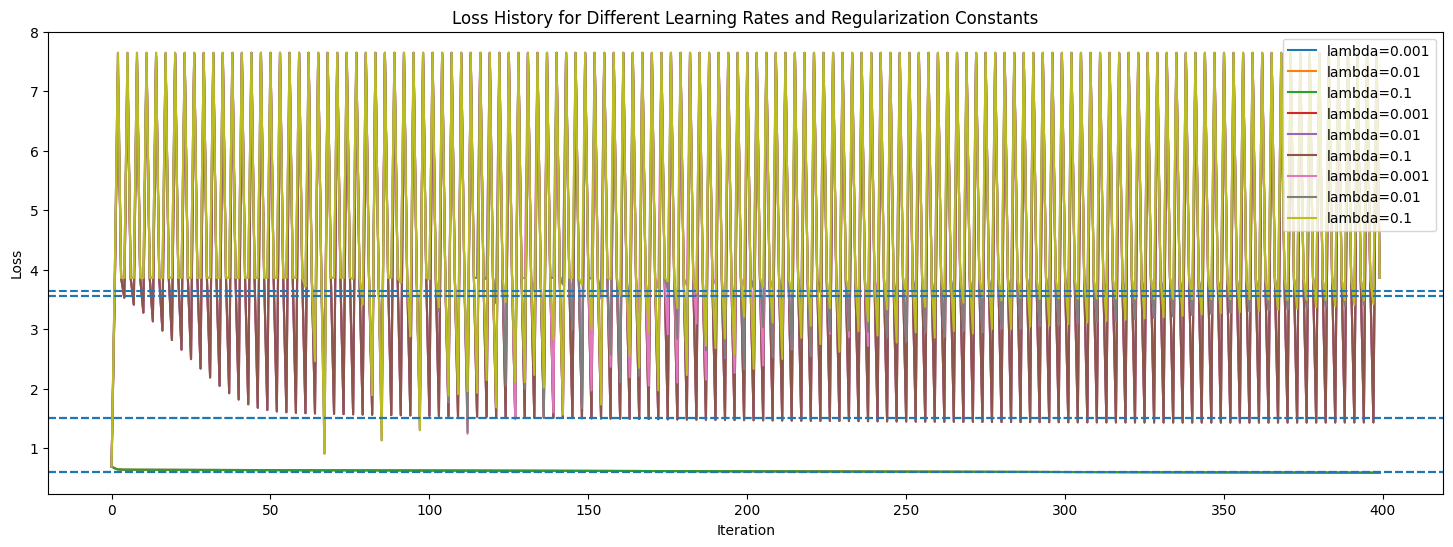

In [131]:
### START CODE HERE ###
# Define ranges for learning rate and regularization constant
learning_rates = [0.001, 0.01, 0.1]
reg_constants = [0.001, 0.01, 0.1]

# Initialize lists to store loss histories
train_losses = []
test_losses = []

# Iterate over each combination of learning rate and regularization constant
for alpha in learning_rates:
    for regLambda in reg_constants:
        # Train the model
        theta, loss_history = fit(X_train, Y_train, regLambda=regLambda, alpha=alpha)
        
        # Make predictions on train and test data
        train_predictions = predict(X_train, theta)
        test_predictions = predict(X_test, theta)
        
        # Compute loss for train and test data
        train_loss = computeCost(theta, X_train, Y_train, regLambda)
        test_loss = computeCost(theta, X_test, Y_test, regLambda)
        
        # Append the loss history for plotting
        train_losses.append((alpha, regLambda, loss_history))
        test_losses.append((alpha, regLambda, test_loss))
        
# Plot the loss history for train and test data
plt.figure(figsize=(18, 6))
for _, regLambda, loss_history in train_losses:
    print(loss_history.shape)
    plt.plot(loss_history, label=f"lambda={regLambda}")
plt.legend()
for _, regLambda, test_loss in test_losses:
    plt.axhline(y=test_loss, linestyle='--', label=f"lambda={regLambda}")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History for Different Learning Rates and Regularization Constants')

plt.show()

print()
### END CODE HERE ###

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

In [150]:
### START CODE HERE ###
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.33, random_state=42)


clf = GaussianNB()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

print(f"Test accuracy = {accuracy_score(y_pred, Y_test) * 100}%")

### END CODE HERE ###

Test accuracy = 92.82828282828282%


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

In [151]:
### START CODE HERE ###
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

print(f"Test accuracy = {accuracy_score(y_pred, Y_test) * 100}%")
### END CODE HERE ###

Test accuracy = 98.48484848484848%


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: It is evident from our observations that `LinearDiscriminantAnalysis` is better for this task, since it has the highest accuracy among all of the classifiers. Although we can test some other classifiers to make sure that this classifier performs better, but for now, it is good :) .